# PREDICTING NEURODEGENERATIVE DISEASES
   Neurodegenerative diseases are a heterogeneous group of disorders that are characterized by the progressive degeneration of the structure and function of the nervous system.They are incurable and debilitating conditions that cause problems with mental functioning also called dementias.  
   
   Neurodegenerative diseases affect millions of people world wide.Alzheimer’s disease and Parkinson’s disease are the most common neurodegenerative diseases. In 2016, an estimated 5.4 million Americans were living with Alzheimer’s disease. An estimated 930,000 people in the United States could be living with Parkinson’s disease by 2020.
   
   The goal of this project is to build a model to accurately predict the presence of a neurodegenerative disease in an individual as early detection of a neurodegenerative disease could be useful for the identification of people who can participate in trials of neuroprotective agents, or ultimately to try and halt disease progression once effective            disease-modifying interventions have been identified.

In [1]:
#Importing data exploration and visualization packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Set Used for analysis and prediction is available at
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/">UCI ML Parkinson’s dataset</a> 

In [2]:
# Reading data from csv file into dataframe
df = pd.read_csv('Parkinsons.csv')

## Exploring Data Set

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
# Target Variable
y = df.status

In [8]:
# Removing Target variable and name variable from data set
X = df.drop(['status', 'name'], axis=1)

In [9]:
# Extracting Column names from the data set
columns = list(X.columns.values)

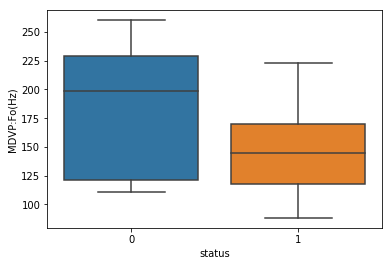

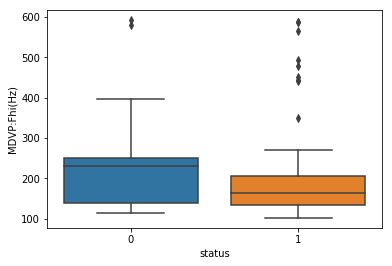

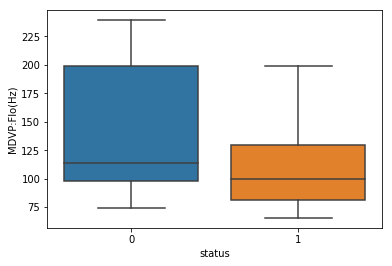

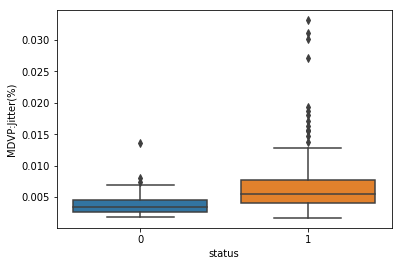

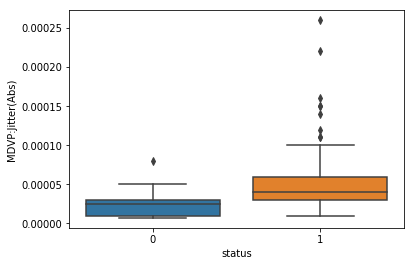

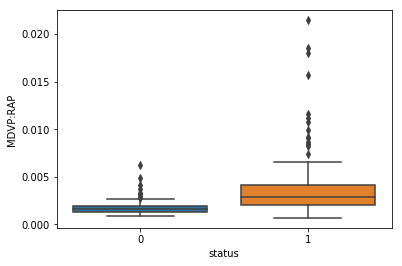

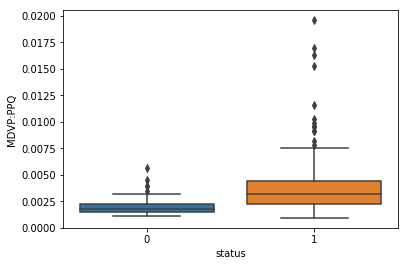

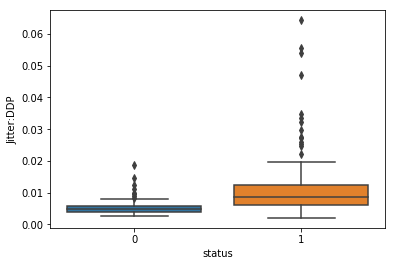

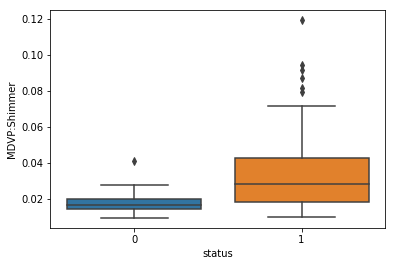

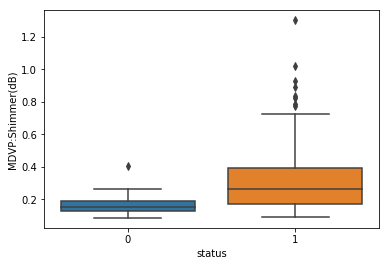

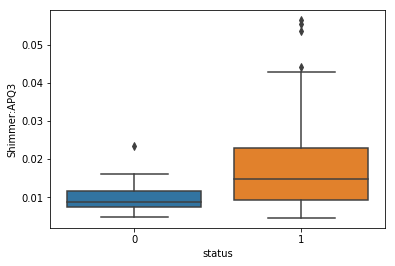

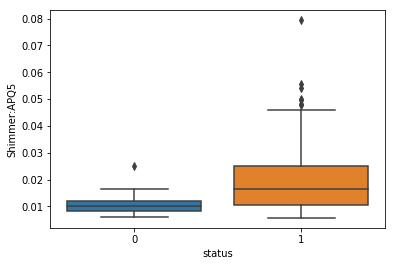

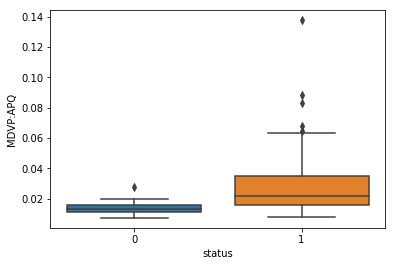

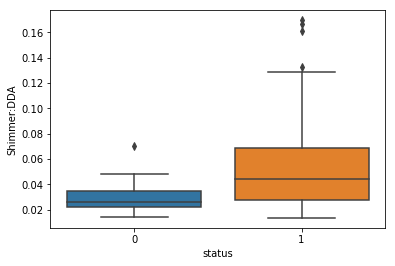

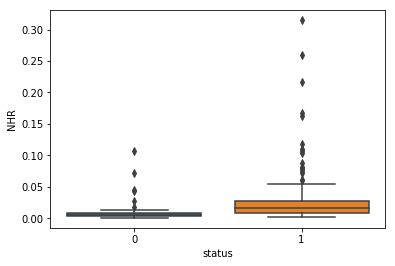

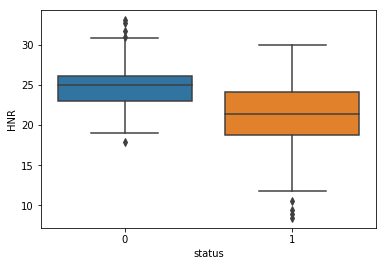

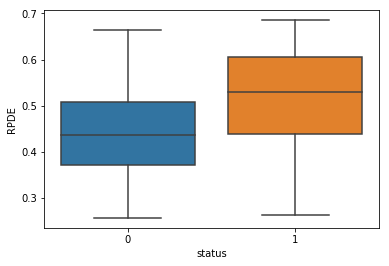

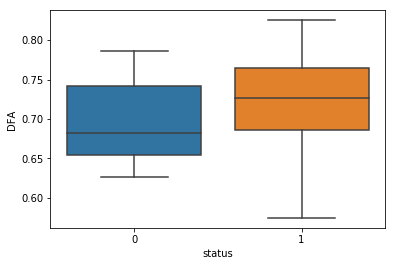

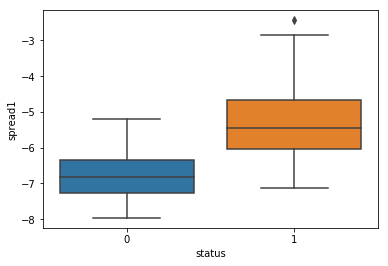

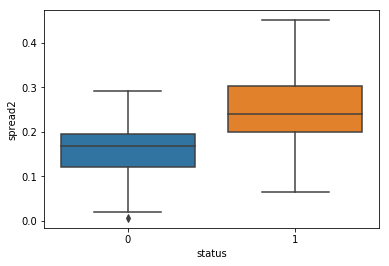

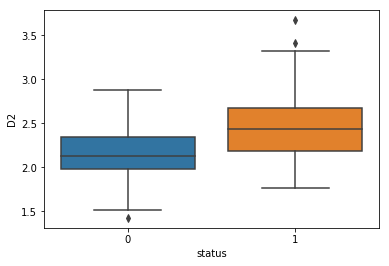

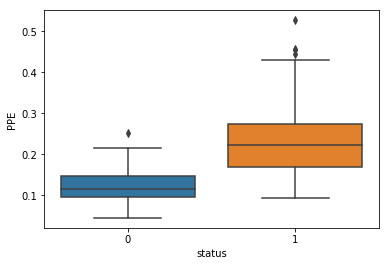

In [10]:
# Plotting Boxplots for the bivariate analysis on all columns
for column in columns:
    sns.boxplot(y, column, data=df)
    plt.show() 

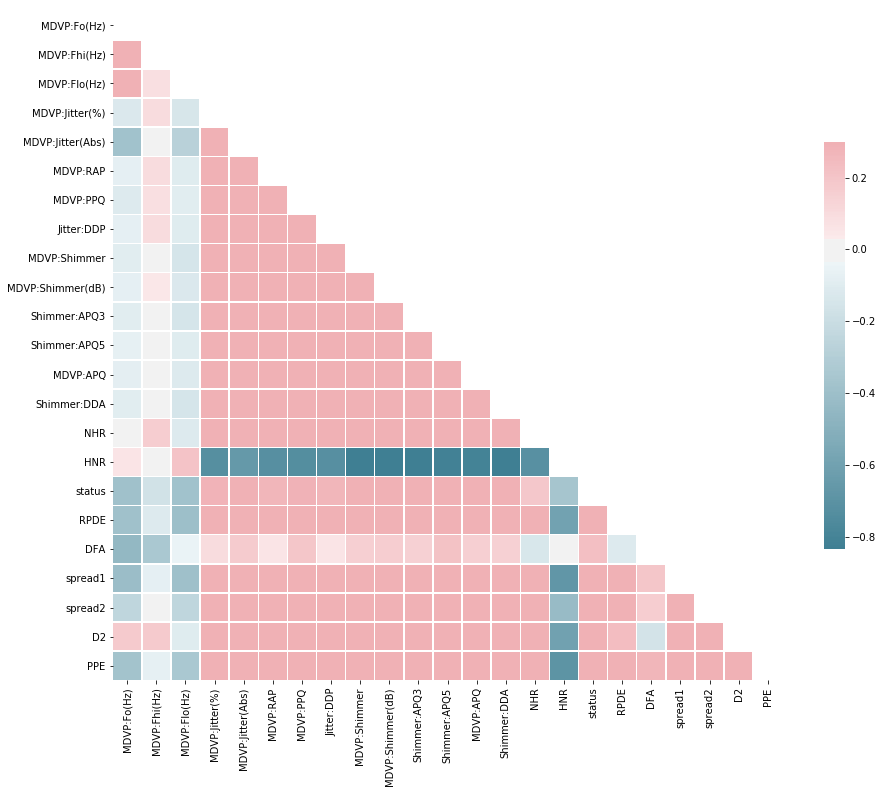

In [11]:
# Creating Diagonal Correlation Matrix Using seaborn 
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Performing Factor Analysis Using Principal Component Method

In [12]:
from factor_analyzer import FactorAnalyzer

In [13]:
# Checking if the data is reliable for factor analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print("Bartlett's Test of Sphericity Result is: {} with p_value: {}".format(chi_square_value, p_value))

Bartlett's Test of Sphericity Result is: 13446.360031984032 with p_value: 0.0


In [14]:
# Checking if we sufficient data for factor analysis
kmo_all, kmo_model = calculate_kmo(X)
print("KMO Test Result is: {}".format(kmo_model))

KMO Test Result is: 0.781509980596122


C:\Users\Usharab\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [15]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [16]:
# Fitting the Factor Analyzer and Printing Resulting eigen-values numpy array 
fa = FactorAnalyzer(rotation=None)
fa.fit(X)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([12.958111, 2.485875, 1.542030, 1.464986, 0.973916, 0.729108,
       0.552245, 0.362403, 0.289838, 0.224126, 0.140565, 0.104841,
       0.069737, 0.038166, 0.022012, 0.017788, 0.012456, 0.007214,
       0.003497, 0.001085, 0.000000, 0.000000])

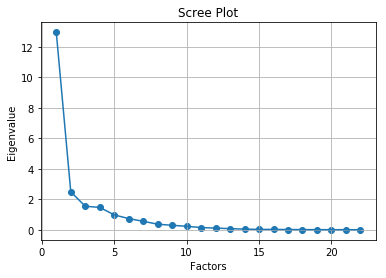

In [17]:
# Making Scree Plot based on the eigen-values
plt.scatter(range(1, X.shape[1]+1),ev)
plt.plot(range(1, X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('Scree Plot.jpg', dpi=500, bbc_inches='tight')
plt.show()

Select the method to use for factor analysis and rotation technique. There are 3 methods for factor analysis and several techniques of rotation available in factor analyzer package according to <a href="https://buildmedia.readthedocs.org/media/pdf/factor-analyzer/latest/factor-analyzer.pdf">documentation</a>. 


In [18]:
# Selecting 4 factors as there are 4 eigen values that are above 1
fa = FactorAnalyzer(n_factors=4, method='principal', rotation='varimax')
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='principal', n_factors=4, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [19]:
# Showing which variable loads on which factor 
loadings = fa.loadings_
loading_df = pd.DataFrame(data=loadings, index=columns, columns=['Factor1','Factor2','Factor3','Factor4'])
loading_df.sort_values(['Factor1','Factor2','Factor3','Factor4'], ascending=False)

,Factor1,Factor2,Factor3,Factor4
Shimmer:APQ5,0.882631,0.408396,0.108327,-0.102811
MDVP:Shimmer,0.852667,0.466436,0.140982,-0.067647
MDVP:APQ,0.837094,0.436144,0.167412,-0.037686
Shimmer:APQ3,0.831912,0.464725,0.112989,-0.077316
Shimmer:DDA,0.831904,0.464744,0.112983,-0.077323
MDVP:Shimmer(dB),0.830506,0.512353,0.113525,-0.046656
D2,0.583986,0.113233,0.290057,0.459291
PPE,0.494050,0.474084,0.578217,-0.134633
MDVP:PPQ,0.481855,0.835533,0.134318,-0.034679
spread2,0.466708,0.052057,0.613032,0.046491


In [20]:
# Getting communalities of the factors
communalities = fa.get_communalities()
pd.DataFrame(data=communalities, index=columns, columns=['Extraction'])

,Extraction
MDVP:Fo(Hz),0.848768
MDVP:Fhi(Hz),0.498527
MDVP:Flo(Hz),0.596138
MDVP:Jitter(%),0.983833
MDVP:Jitter(Abs),0.963551
MDVP:RAP,0.983592
MDVP:PPQ,0.949544
Jitter:DDP,0.983610
MDVP:Shimmer,0.969056
MDVP:Shimmer(dB),0.967310


In [21]:
# Getting the variance explained by the factors
variance = np.asarray(fa.get_factor_variance())

pd.DataFrame(data=variance, index=["Variance", "Proportional Variance", "Cumulative Variances"], columns=['Factor1','Factor2','Factor3','Factor4'])

,Factor1,Factor2,Factor3,Factor4
Variance,6.87852,6.520478,3.119919,1.932084
Proportional Variance,0.31266,0.296385,0.141815,0.087822
Cumulative Variances,0.31266,0.609045,0.750860,0.838682


## Performing PCA Analysis to Show Total Variance Explained By 4 Factors

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
# Scaling Data before doing pca
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# Performing 
pca = PCA(n_components = 4)
X_decomposed = pca.fit_transform(X1) 
  
explained_variance = pca.explained_variance_ratio_

print('Total variance explained by 4 factors: {}'.format(explained_variance.sum()))

Total variance explained by 4 factors: 0.8386818850900144


## Importing Libraries for Predictive Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [25]:
# Splitting data into Training and Testing Set  
X_train, X_test, y_train, y_test = train_test_split(X_decomposed, y, test_size=0.3, random_state=0)

## Fitting Different Models And Making Predictions

In [26]:
# Fitting Logistic Regression Model for training
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("The accuracy of Logistic Regression Model is {}".format(accuracy_score(y_test, y_pred)))
print("The f1-score of Logistic Regression Model is {}".format(f1_score(y_test, y_pred)))

The accuracy of Logistic Regression Model is 0.8813559322033898
The f1-score of Logistic Regression Model is 0.924731182795699


In [27]:
# Fitting Decision Tree Classifier Model for training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("The accuracy of Decision Tree Model is {}".format(accuracy_score(y_test, y_pred)))
print("The f1-score of Decision Tree Model is {}".format(f1_score(y_test, y_pred)))

The accuracy of Decision Tree Model is 0.9322033898305084
The f1-score of Decision Tree Model is 0.9583333333333334


In [28]:
# Fitting Support Vector Classifier Model for training
sv = SVC(gamma='scale')
sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)

print("The accuracy of Support Vector Model is {}".format(accuracy_score(y_test, y_pred)))
print("The f1-score of Support Vector Model is {}".format(f1_score(y_test, y_pred)))

The accuracy of Support Vector Model is 0.9322033898305084
The f1-score of Support Vector Model is 0.9583333333333334


In [29]:
# Fitting Gradient Boosting Classifier Model for training
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("The accuracy of Gradient Boosting Model is {}".format(accuracy_score(y_test, y_pred)))
print("The f1-score of Gradient Boosting Model is {}".format(f1_score(y_test, y_pred)))

The accuracy of Gradient Boosting Model is 0.9661016949152542
The f1-score of Gradient Boosting Model is 0.9777777777777777


In [30]:
# Fitting Random Forest Classifier Model for training
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("The accuracy of Random Forest Model is {}".format(accuracy_score(y_test, y_pred)))
print("The f1-score of Random Forest Model is {}".format(f1_score(y_test, y_pred)))

The accuracy of Random Forest Model is 0.9152542372881356
The f1-score of Random Forest Model is 0.9438202247191011
